# problem statement 

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

# Load required libraries

In [229]:
#import important libraris

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [199]:
#load the data into pandas dataframe

credit_fraud_data = pd.read_csv('creditcard.csv')
credit_fraud_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [200]:
#validate the shape of the data 
credit_fraud_data.shape

(284807, 31)

In [7]:
#check for datatypes of colums
credit_fraud_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [201]:
#lets veriefy missing vallues 
credit_fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [202]:
#using this code we can see last 9 rows of data 
credit_fraud_data.tail(9)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
credit_fraud_data.isnull().sum()/len(credit_fraud_data)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [203]:
#The below command will help us understand the total number of columns present in the dataset
len(credit_fraud_data.columns)

31

In [69]:
#transpose if a nice way of discribing the data ,we just need to do a,T after the dataframe and transpose show you stetistical terms above  as column
credit_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [204]:
#lets we check how many columns are in the dataset.

credit_fraud_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [205]:
# Check for duplicate records
duplicate_rows = credit_fraud_data.duplicated().sum()
print('Number of duplicate records:', duplicate_rows)

Number of duplicate records: 1081


In [207]:
# Display the distribution of legitimate transactions and fraudulent transactions
print(credit_fraud_data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [206]:
#get fraud and normal dataset.

fraud = credit_fraud_data[credit_fraud_data["Class"]== 1]
normal = credit_fraud_data[credit_fraud_data["Class"]== 0]

In [117]:
print(fraud.shape,normal.shape)

(451, 31) (273132, 31)


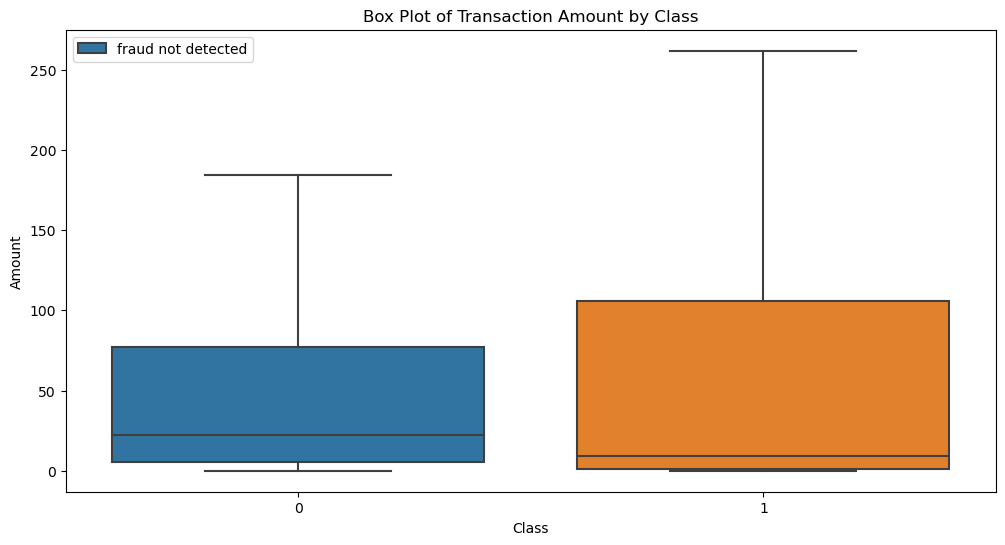

In [209]:
#Box plots for 'Amount' and 'Time' by Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=credit_fraud_data, showfliers=False,)
plt.title('Box Plot of Transaction Amount by Class')
plt.legend(["fraud not detected"])
plt.show()

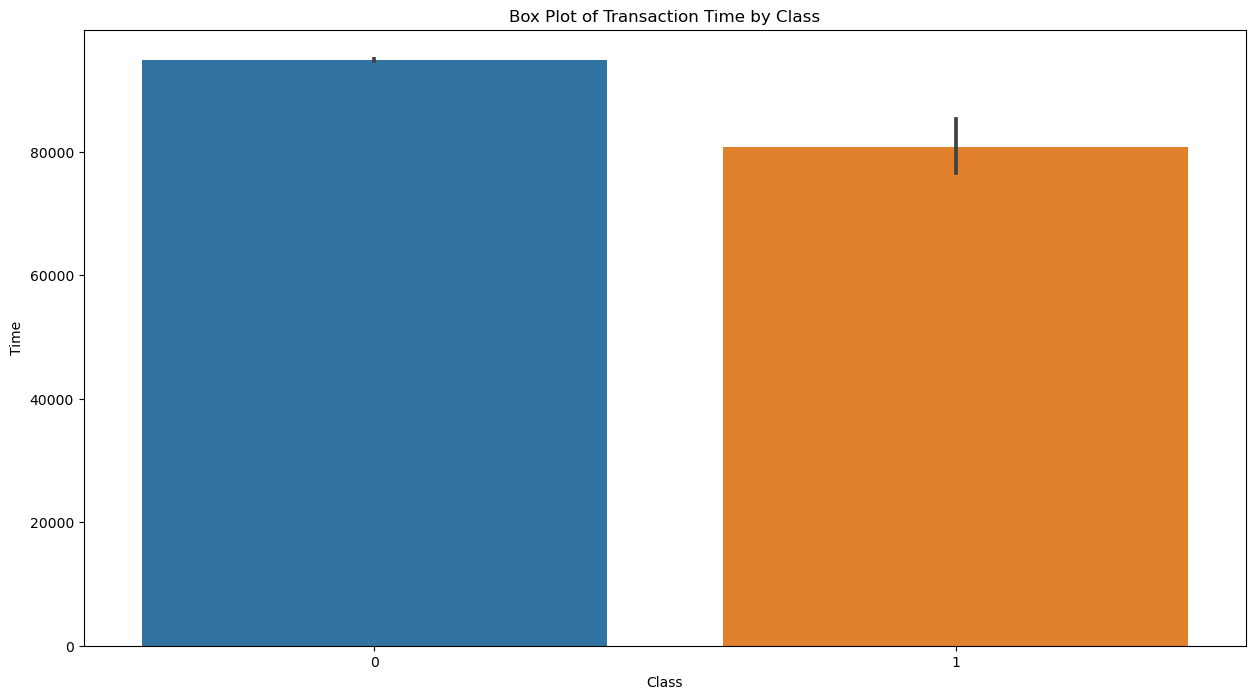

In [210]:
plt.figure(figsize=(15,8))
sns.barplot(data=credit_fraud_data, y = 'Time',x='Class')
plt.title('Box Plot of Transaction Time by Class')
plt.show()

Text(0.5, 1.0, 'Distribution of Frauds(0: No Fraud || 1: Fraud')

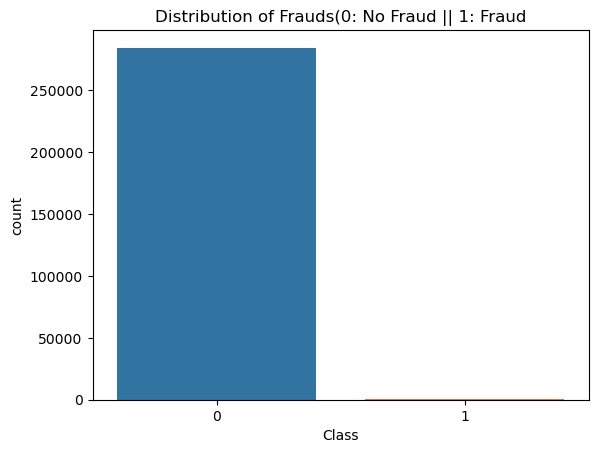

In [211]:
#Checking for class distribution¶

sns.countplot(x="Class",data=credit_fraud_data)
plt.title('Distribution of Frauds(0: No Fraud || 1: Fraud')


In [212]:
# usig this method we can check Highly imbalanced dataset with 99% of data as not-fraud and only 0.03% of data as fraud


(credit_fraud_data["Class"].value_counts()/284807)*100


0    99.827251
1     0.172749
Name: Class, dtype: float64

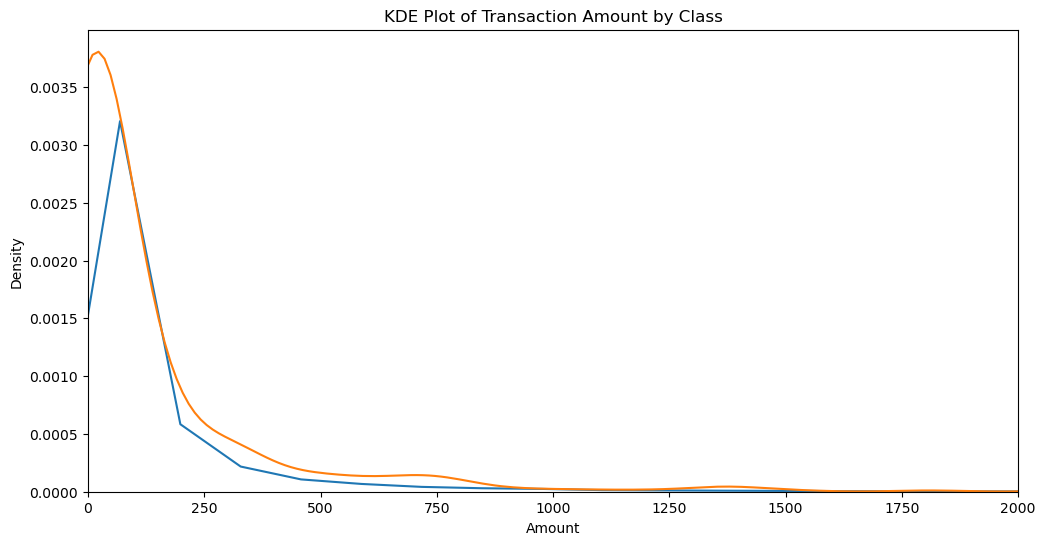

In [213]:
# Visualize KDE plot of transaction amount by class
plt.figure(figsize=(12, 6))
sns.kdeplot(credit_fraud_data[credit_fraud_data['Class'] == 0]['Amount'], label='Class 0')
sns.kdeplot(credit_fraud_data[credit_fraud_data['Class'] == 1]['Amount'], label='Class 1')
plt.title('KDE Plot of Transaction Amount by Class')
plt.xlim(0, 2000)  # Limiting x-axis for better readability
plt.show()

Text(0.5, 1.0, 'Distribution of Transaction Time')

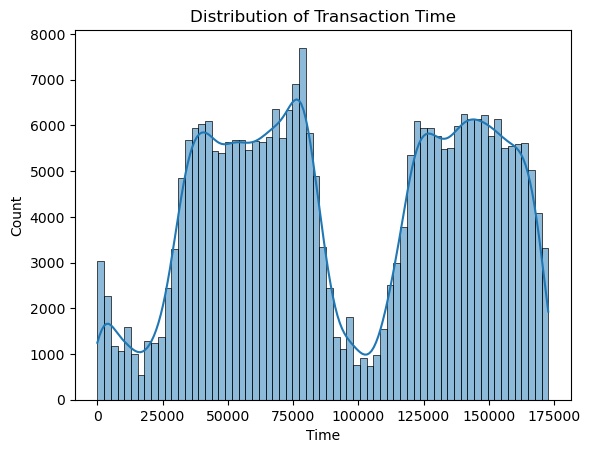

In [214]:
ax = sns.histplot(data=credit_fraud_data, x=credit_fraud_data["Time"], kde=True)
ax.set_title("Distribution of Transaction Time")


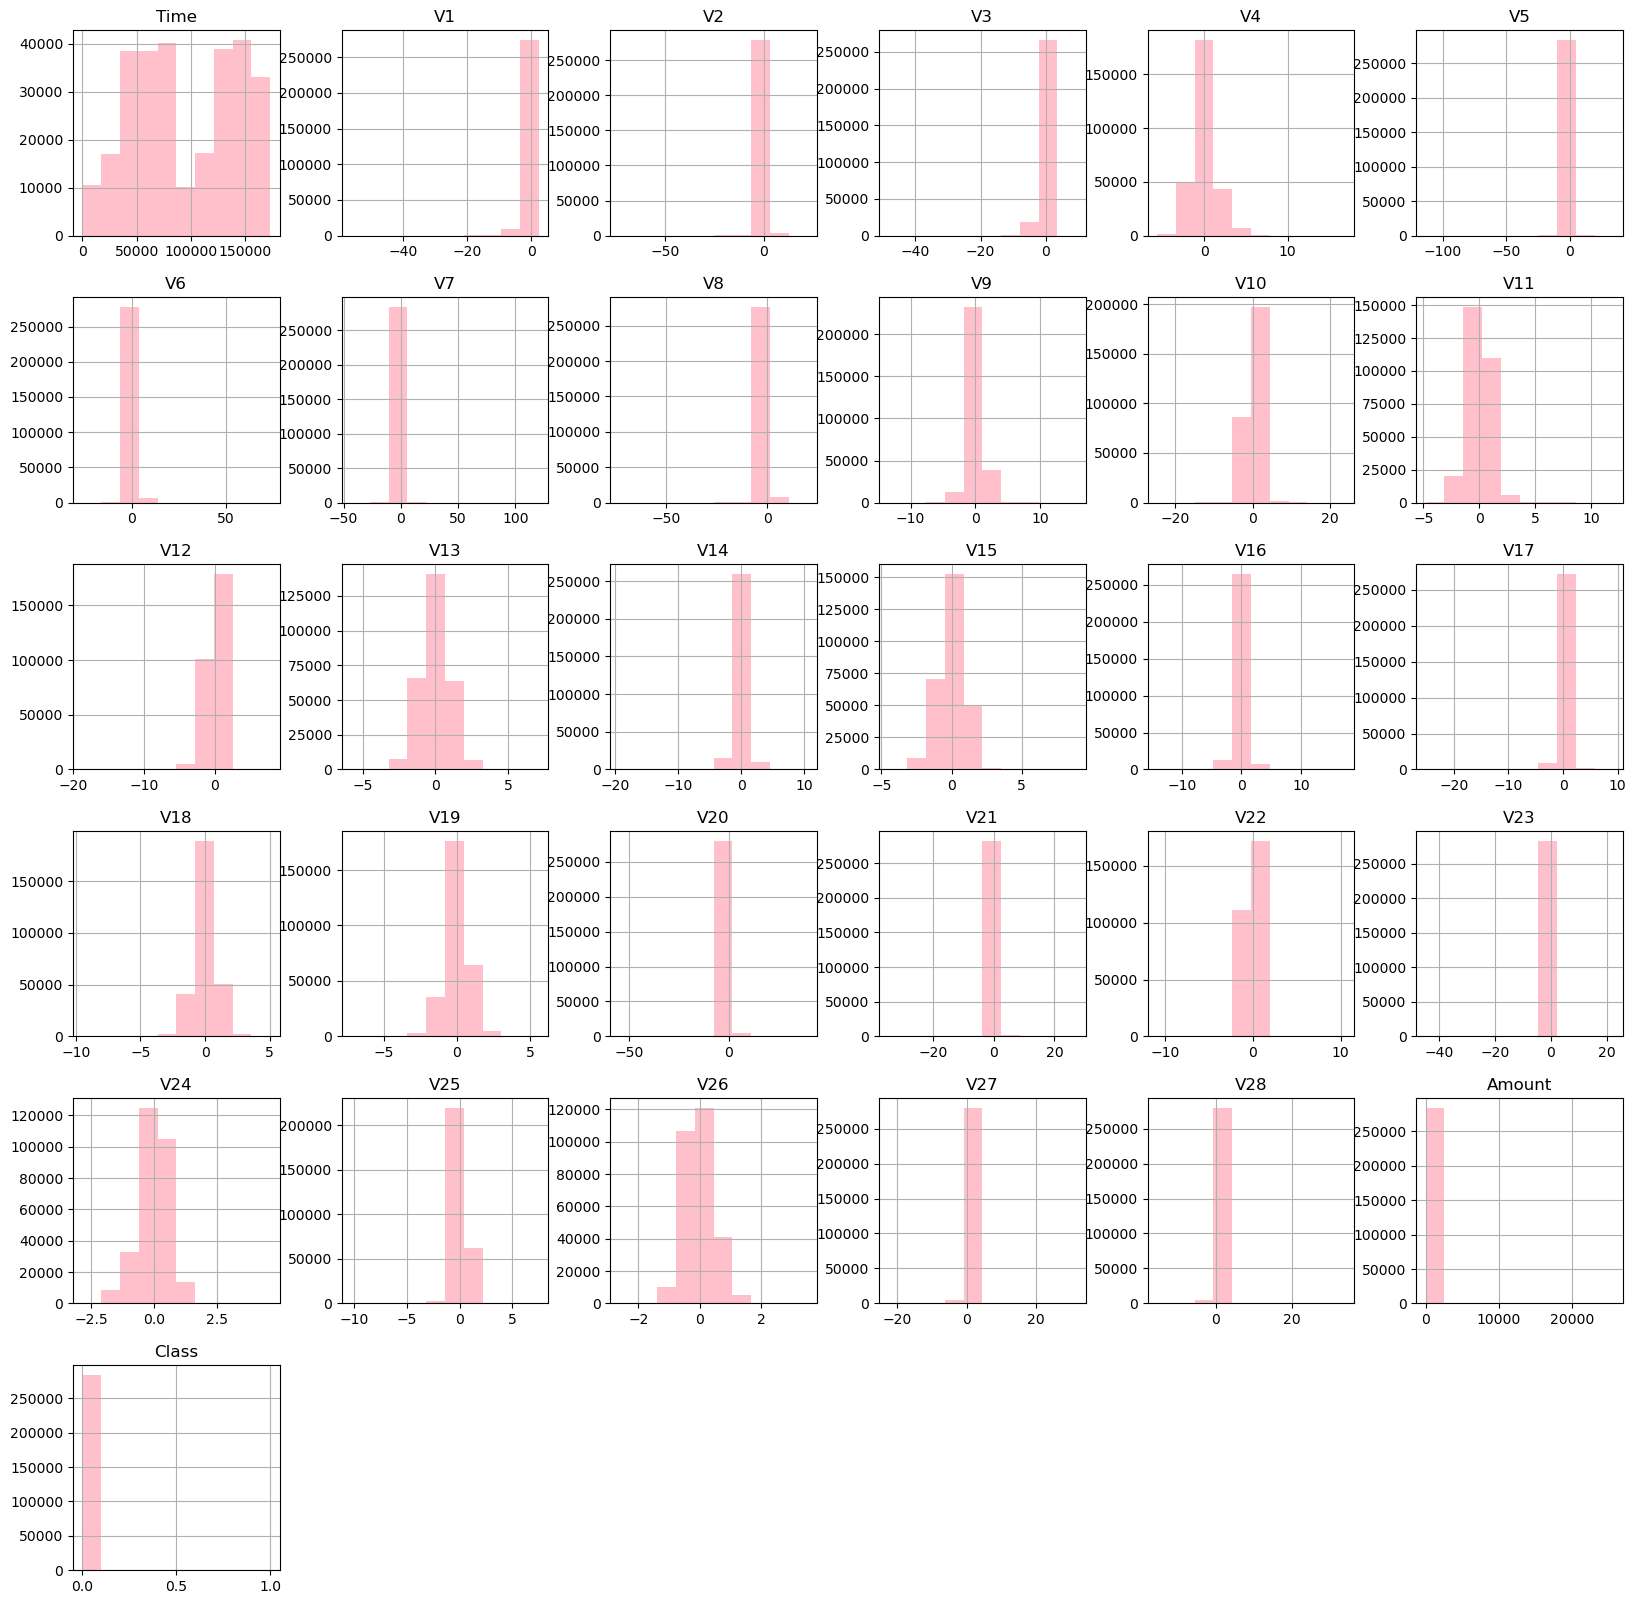

In [215]:
 credit_fraud_data.hist(figsize=(20,20),color = 'pink')
plt.show()

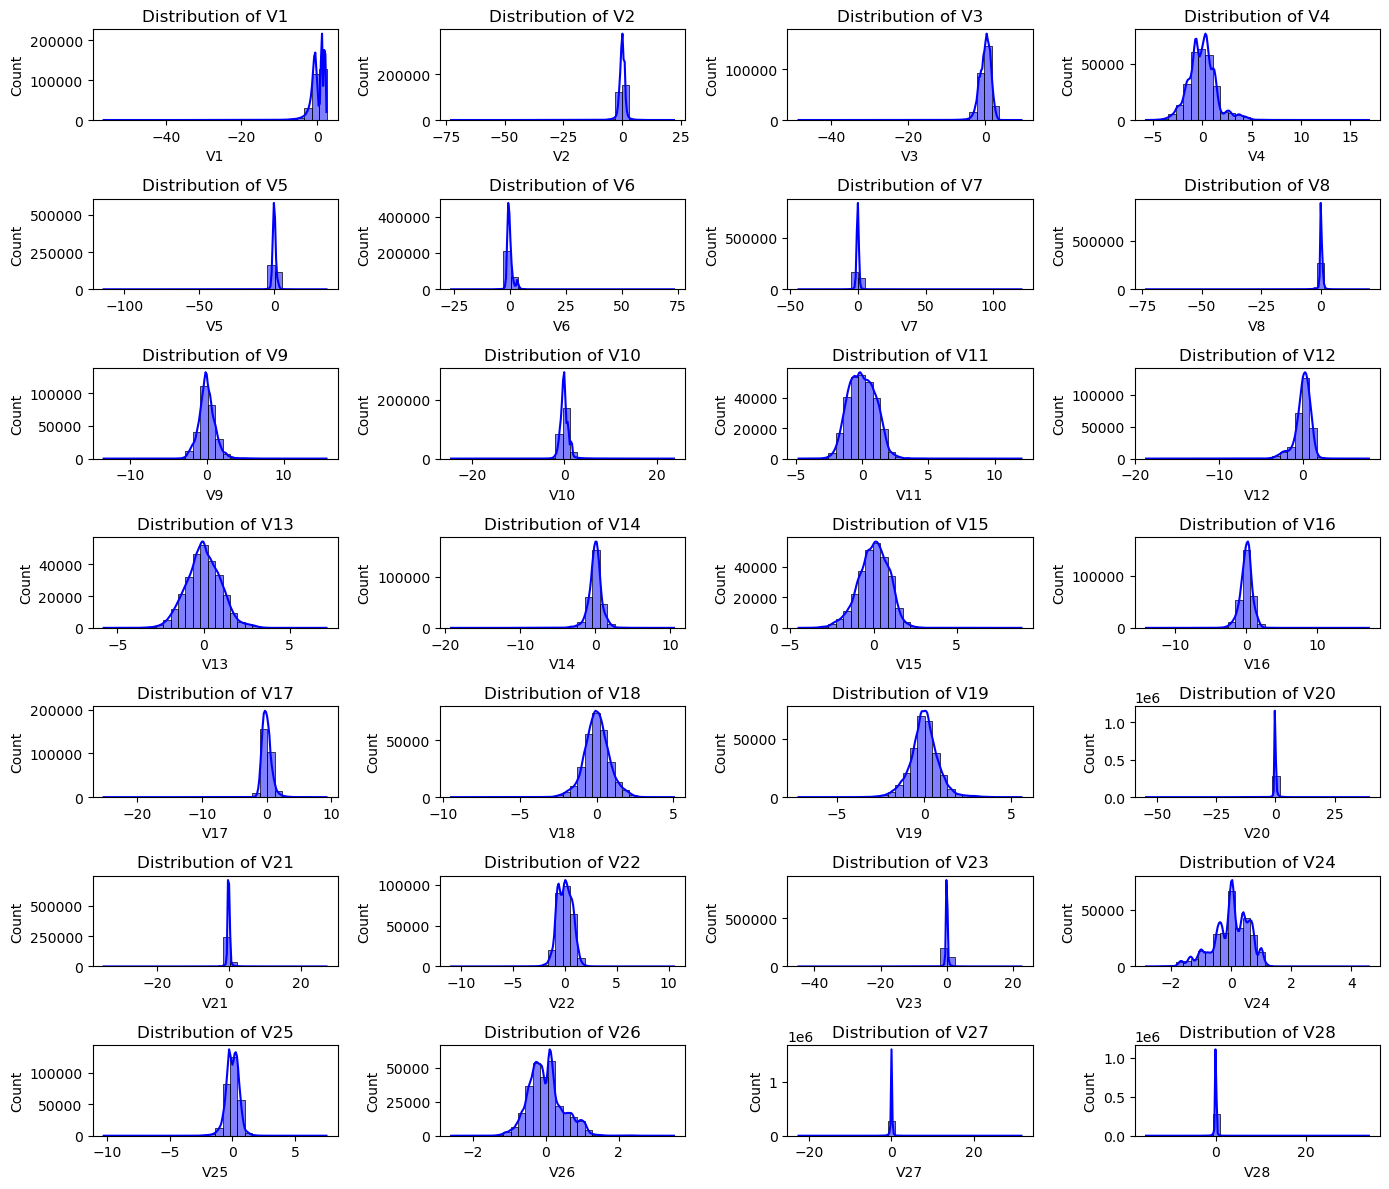

In [218]:
# Explore feature distributions
plt.figure(figsize=(14, 12))
for i in range(1, 29):  # Assuming V1 to V28 are the feature columns
    plt.subplot(7, 4, i)
    sns.histplot(credit_fraud_data[f'V{i}'], bins=30, kde=True,color = 'blue')
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

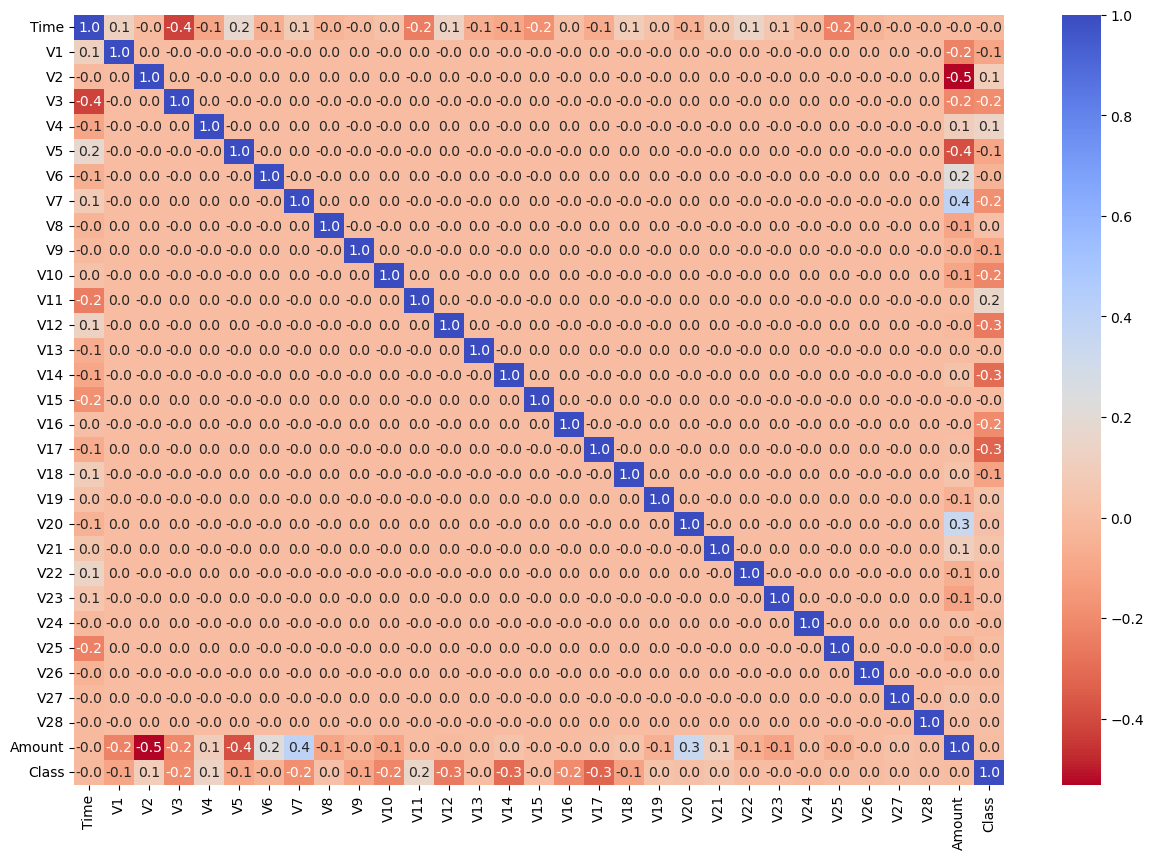

In [217]:
# Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(credit_fraud_data.corr(), annot= True, fmt='.1f', cmap='coolwarm_r')
plt.show()
 

In [234]:
# Data Cleaning and Preprocessing

# Handling outliers using Isolation Forest for 'Amount' and 'Time'
outlier_detector = IsolationForest(contamination=0.01, random_state=1)
credit_fraud_data['Outlier'] = outlier_detector.fit_predict(credit_fraud_data[['Amount', 'Time']])
credit_fraud_data = credit_fraud_data[credit_fraud_data['Outlier'] == 1].drop(columns='Outlier')

In [235]:
# Scaling 'Amount' using StandardScaler
scaler = StandardScaler()
credit_fraud_data['Amount'] = scaler.fit_transform(credit_fraud_data[['Amount']])


In [236]:
# Under-sampling
Legit = credit_fraud_data[credit_fraud_data['Class'] == 0]
fraud = credit_fraud_data[credit_fraud_data['Class'] == 1]
Legit_sample = Legit.sample(n=492)
new_dataset = pd.concat([Legit_sample, fraud], axis=0)

In [238]:
# Split the data into features and targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [239]:
# Split the data into Training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [240]:
# Model Selection

# Model training: Logistic Regression
logistic_model = LogisticRegression(random_state=2, max_iter=10000, solver='lbfgs')  # Increase max_iter and specify solver

In [241]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=2, max_iter=10000, solver='lbfgs'), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=2),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [242]:
# Get the best hyperparameter
best_C = grid_search.best_params_['C']


In [243]:
# Model Training with the best hyperparameter
logistic_model = LogisticRegression(C=best_C, random_state=2, max_iter=10000, solver='lbfgs')  # Increase max_iter and specify solver
logistic_model.fit(X_train, Y_train)

LogisticRegression(C=100, max_iter=10000, random_state=2)

In [244]:
# Cross-Validation
cross_val_scores = cross_val_score(logistic_model, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Scores:', cross_val_scores)


Cross-Validation Scores: [0.92207792 0.96753247 0.96103896 0.96103896 0.92156863]


In [245]:
# Model Evaluation

# Accuracy score on training data for Logistic Regression
X_train_prediction_logistic = logistic_model.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction_logistic, Y_train)
print('Logistic Regression Training data accuracy:', training_data_accuracy_logistic)

Logistic Regression Training data accuracy: 0.9492847854356307


In [246]:
# Accuracy score on test data for Logistic Regression
X_test_prediction_logistic = logistic_model.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction_logistic, Y_test)
print('Logistic Regression Test data accuracy:', test_data_accuracy_logistic)

Logistic Regression Test data accuracy: 0.9222797927461139


In [247]:
# Additional Model Evaluation Metrics for Logistic Regression
logistic_train_auc = roc_auc_score(Y_train, logistic_model.predict_proba(X_train)[:, 1])
logistic_test_auc = roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])

print('Logistic Regression Train AUC:', logistic_train_auc)
print('Logistic Regression Test AUC:', logistic_test_auc)

Logistic Regression Train AUC: 0.9829259379567972
Logistic Regression Test AUC: 0.973565441650548


In [248]:
# Model Comparison (Random Forest as an alternative)
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=2)

In [249]:
# Additional Model Evaluation Metrics for Random Forest
rf_train_auc = roc_auc_score(Y_train, rf_model.predict_proba(X_train)[:, 1])
rf_test_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1])
print('Random Forest Train AUC:', rf_train_auc)
print('Random Forest Test AUC:', rf_test_auc)

Random Forest Train AUC: 1.0
Random Forest Test AUC: 0.9810874704491727


In [250]:
#Using F1 Score we are checking the accuracy on the testing dataset of logistic regression.
print('\nClassification Report (Logistic Regression):\n', classification_report(Y_test, X_test_prediction_logistic))
print('\nConfusion Matrix (Logistic Regression):\n', confusion_matrix(Y_test, X_test_prediction_logistic))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.93      0.90      0.92        94

    accuracy                           0.92       193
   macro avg       0.92      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193


Confusion Matrix (Logistic Regression):
 [[93  6]
 [ 9 85]]


In [251]:
#Using F1 Score we are checking the accuracy on the testing dataset of random forest,

print('\nClassification Report (Random Forest):\n', classification_report(Y_test, rf_model.predict(X_test)))
print('\nConfusion Matrix (Random Forest):\n', confusion_matrix(Y_test, rf_model.predict(X_test)))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.97      0.91      0.94        94

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193


Confusion Matrix (Random Forest):
 [[96  3]
 [ 8 86]]


In [252]:
# Model Interpretability

# Logistic Regression coefficients
feature_names = X.columns
coefficients = logistic_model.coef_[0]
feature_importance_logistic = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_logistic = feature_importance_logistic.sort_values(by='Coefficient', ascending=False)
print('\nLogistic Regression Coefficients:\n', feature_importance_logistic)


Logistic Regression Coefficients:
    Feature  Coefficient
4       V4     0.809121
11     V11     0.316677
29  Amount     0.149442
21     V21     0.137331
22     V22     0.100880
23     V23     0.045857
2       V2     0.016218
28     V28     0.009508
19     V19     0.002106
27     V27     0.000184
0     Time    -0.000031
5       V5    -0.004744
25     V25    -0.020149
20     V20    -0.031129
24     V24    -0.038010
15     V15    -0.042111
26     V26    -0.042146
1       V1    -0.073247
18     V18    -0.102083
13     V13    -0.129662
6       V6    -0.189116
8       V8    -0.241856
9       V9    -0.349833
16     V16    -0.370638
7       V7    -0.418031
17     V17    -0.566980
10     V10    -0.668637
12     V12    -0.753678
3       V3    -0.816443
14     V14    -1.044167
